# Exercise for PhD students and interested Master students


## Task (A): Detecting ARCH Effects in AR(1) Residuals

A.1 Load the data file "timeseries.csv" and assign the variable name $r_t$ to it 

A.2 Plot the time series of $r_t$

A.3 Use the Helper_TestingForARCHEffects file to evaluate whether there is evidence for heteroscedasticity in $r_t$. Use an AR(1) model and up to 10 lags of correlation in squared residuals. Do you reject the hypothesis of a constant vol in AR(1) residuals?



## Task (B): Fitting AR(1)-ARCH(1) using 2pass Regressions

B.1 Fit an AR(1)-ARCH(1) to $r_t$ by means of 2pass regression

B.2 Give out respective parameter estimates

B.3. Plot the resulting squared residuals.

B.4 Does the ARCH(1) capture all vs none vs a bit of the heteroscedasticity in $r_t$?



## Task (C): Fitting AR(1)-ARCH(1) using MLE

C.0 Write down the log likelihood function for $\{r_t\}_t$ assuming Gaussian errors.

C.1 Write a function Neg_loglikelihood_ar1_arch1() that takes as in put a list of model parameters. The function returns the negative log likelihood value of the observed time series $\{r_t\}_t$. Hint: You can treat $\{r_t\}_t$ as a global variable.

C.2 Find smart starting values for the unknown parameters. Hint: Rely on 2-pass regressions.

C.3 Rely on the scipy package and the Nelder-Mead optimization routine to conduct a MLE optimization of the negative log likelihood function.

C.4 Print out the MLE parameters 







**Observation:**

 

# TASK A

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa import ar_model

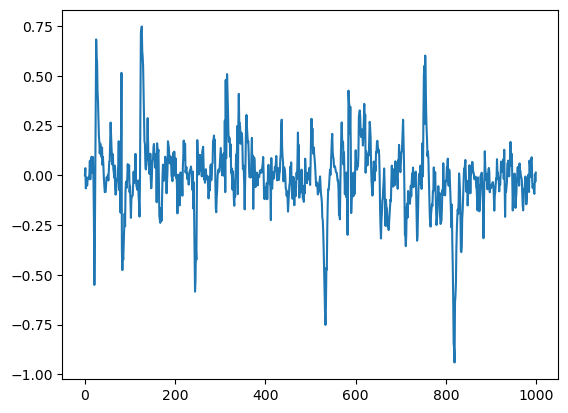

In [3]:
rt = pd.read_csv(r'C:\Users\simon\OneDrive\Dokumente\[1] Uni\[1] Master\2. Semester Sommersemester 2024\Modeling_dynamics_of_financial_market\Code\Modeling_dynamics_of_financial_market\Exercise\E02_Dynamic_Vol_Modeling\Data\timeseries.csv', index_col=0)
plt.plot(rt.index)

In [4]:
print(np.array(rt.index.to_list()))

[ 0.00000000e+00  3.57639487e-02 -6.55835817e-02 -5.33433293e-02
 -1.16033307e-02 -5.13763088e-02 -2.39282118e-02 -1.34191062e-02
 -1.05193820e-02 -1.71455935e-02  8.24612399e-03  7.20297244e-02
 -2.05845487e-02  7.72730400e-02  8.56310576e-02  9.30427479e-02
  1.14372766e-02  1.98505645e-02  9.17049953e-02 -2.29863914e-02
 -2.28803299e-01 -5.51057022e-01 -3.44484548e-01 -2.18246163e-02
  2.66093476e-01  6.82647277e-01  5.91785899e-01  5.67014054e-01
  4.25395840e-01  3.75308574e-01  2.84067628e-01  1.98455013e-01
  1.66373554e-01  1.09031242e-01  1.59491181e-01  1.44437940e-01
  1.36612070e-01  9.10405857e-02  1.39512886e-01  5.15889696e-02
  9.20808437e-02  4.89723134e-02 -1.29520428e-02 -4.52443750e-02
 -8.48447648e-02 -8.25325365e-02 -8.36615783e-02 -5.04241737e-02
 -1.06551176e-02 -1.70402083e-02 -1.49451604e-02  2.50331575e-03
 -2.60431259e-02  1.95196698e-02  6.91949740e-02  7.00747414e-02
  1.80626051e-01  2.64967478e-01  1.97645886e-01  1.39314591e-01
  9.90873546e-02  5.34650

In [5]:
def lag_data(data, lags):
    nobs = data.shape[0]
    
    y_lag = data[lags : nobs]
    x_lag = np.matrix(np.zeros( (nobs-lags) * lags).
                      reshape( (nobs-lags), lags) )
    
    for i in range(1, lags+1):
        x_lag[:,i-1] = data[ (lags-i) : (nobs-i) ].\
            reshape(nobs-lags, 1)
        
    return x_lag, y_lag

def Portmanteau_Test(data, p, m): 

    # Run OLS regression to obtain residuals of AR(p) model
    #
    Y = lag_data(data, p)[1]
    X = sm.add_constant(lag_data(data, p)[0])
    reg = sm.OLS(Y, X).fit()
    resid = reg.resid

    T = len(resid)

    # Calculate auto-correlations in the squared residuals up to lag m
    #
    eps2_t = resid**2
    # Iterate across all lags l up to m and calculate test-statistics Q(m)
    #
    total = 0

    for l in range(1, m+1):
        rho2 = pd.Series(eps2_t).autocorr(l)**2
        total = total + rho2 / (T - l)

    Q = T * (T+2) * total

    pval = stats.chi2.pdf(Q, m)

    return Q, pval

In [6]:
Q, pval = Portmanteau_Test(np.array(rt.index.to_list()), 1,10)
print(Q, pval)

176.54782842655712 5.823907401970099e-33


With a pvalue like this it is highly significant

# TASK B

In [12]:
model = ar_model.AutoReg(np.array(rt.index.to_list()),1).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(1)   Log Likelihood                 942.658
Method:               Conditional MLE   S.D. of innovations              0.094
Date:                Fri, 17 May 2024   AIC                          -1879.316
Time:                        09:43:00   BIC                          -1864.596
Sample:                             1   HQIC                         -1873.721
                                 1000                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.003     -0.288      0.774      -0.007       0.005
y.L1           0.8375      0.017     48.447      0.000       0.804       0.871
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1940           +0.0000j            1.1940            0.0000
-----------------------------------------------------------------------------
"""

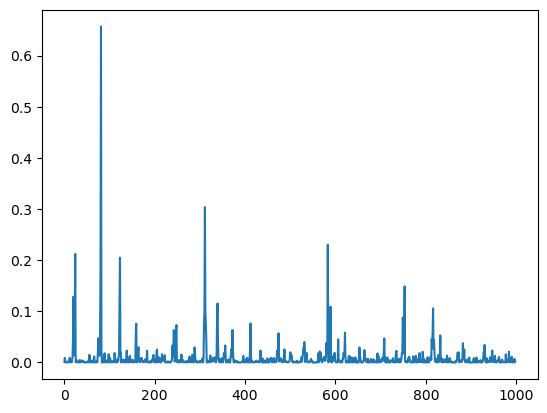

In [19]:
resid = model.resid
plt.plot(resid**2)

## Task (D): Fitting AR(1)-GARCH(1,1) using MLE

D.0 Write down the log likelihood function for $\{r_t\}$ assuming Gaussian errors.

D.1 Write a function called garch11_variance(alpha_0, alpha_1, beta_1, sigma2_1, epsilon). The function returns a time series of GARCH(1,1) variance terms. Hint: sigma2_1 is a parameter and captures the first variance that starts the GARCH(1,1) recursion.

D.2 Write a function called Neg_loglikelihood_ar1_GARCH11(parameters). Parameters is a list of model parameters. The function returns the negative log likelihood of $\{r_t\}$.

D.3 Rely on 2pass regression to pin down smart starting values for "parameters". Use 0.1 and 1.0 for beta_1 and sigma2_1, respectively. 

D.4 Rely on the scipy package and the Nelder-Mead optimization routine to conduct a MLE optimization of the negative log likelihood function.

D.5 Print out the MLE parameters 

D.6 Refit the AR(1)-GARCH(1,1) model by using Python's arch_model. Do optimal parameters and log likelihood differ from D.5?

In [21]:
def garch11_variance(alpha_0, alpha_1, beta_1, sigma2_1, epsilon):
    return alpha_0 + alpha_1 * epsilon + beta_1 * sigma2_1

def Neg_loglikelihood_ar1_GARCH11(params):
    pass
